<a href="https://colab.research.google.com/github/Omo-Tines/Hate-Speech-Detection-ML/blob/main/Hate_Speech_Detection_ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hate Speech Detection - Machine learning Final Project
## Team members:
### - Stacy Nyamekye Sarfo - 55242022
### - Olaseni Towobola - 30812022

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os
import glob
from matplotlib import style
style.use('ggplot')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = zipfile.ZipFile('/content/drive/MyDrive/ML_Final/hate-speech-and-offensive-language.zip', 'r')

In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/ML_Final/hate-speech-and-offensive-language/data/labeled_data.csv')

In [ ]:
tweets.tail()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  
24779  you've gone and broke the wrong heart baby, an...  
24780  young buck wanna eat!!.. dat nigguh like I ain...  
24781              youu got wild bitches tellin you lies  
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

In [ ]:
tweets.columns = tweets.columns.str.replace('class', 'cls')

In [ ]:
tweets.tail()

Unnamed: 0  count  hate_speech  offensive_language  neither  cls  \
24778       25291      3            0                   2        1    1   
24779       25292      3            0                   1        2    2   
24780       25294      3            0                   3        0    1   
24781       25295      6            0                   6        0    1   
24782       25296      3            0                   0        3    2   

                                                   tweet  
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  
24779  you've gone and broke the wrong heart baby, an...  
24780  young buck wanna eat!!.. dat nigguh like I ain...  
24781              youu got wild bitches tellin you lies  
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

In [ ]:
# printing 2 tweets
print(tweets ['tweet'].iloc[0],"\n")
print(tweets ['tweet'].iloc[1],"\n")


!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 



#Text Pre-processing
in this section we remove the symbols and the other characters in the text that can cause the model to fail

In [ ]:
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet = re.sub(r'rt','',tweet) #to remove the retweet
    tweet = re.sub(r'empty dataframe columns','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [ ]:
tweets.tweet = tweets['tweet'].apply(data_processing)

#To remove duplicates

In [ ]:
tweets = tweets.drop_duplicates('tweet')

In [ ]:
lemmatiser = WordNetLemmatizer()
def lemmatising(data):
    tweet = [lemmatiser.lemmatize(word) for word in data]
    return data

In [ ]:
tweets['tweet'] = tweets['tweet'].apply(lambda x: lemmatising(x))

In [ ]:
# printing the data to see the effect of preprocessing
print(tweets['tweet'].iloc[0],"\n")
print(tweets['tweet'].iloc[1],"\n")

mayasolovely woman shouldnt complain cleaning house amp man always take trash 

mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place 



In [ ]:
tweets['hate_speech'].value_counts()

0    19724
1     3405
2     1247
3      287
4       20
5        7
6        5
7        3
Name: hate_speech, dtype: int64

In [ ]:
tweets['offensive_language'].value_counts()

3    13328
2     4232
0     3473
1     2063
6      852
5      367
4      249
9       65
8       37
7       32
Name: offensive_language, dtype: int64

### Data Visualisation

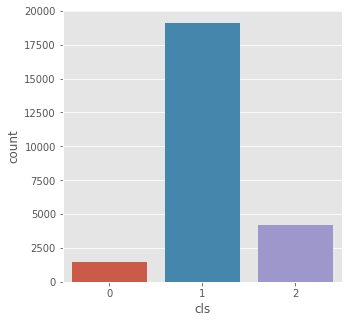

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='cls', data = tweets)

For the class data, 0 - hate speech, 1 - offensive speech and 2 - neither

Text(0.5, 1.0, 'Distribution of sentiments')

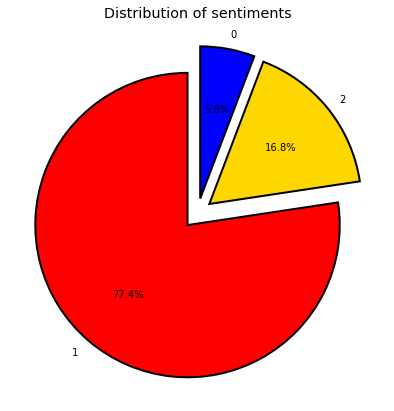

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold","blue",)
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweets['cls'].value_counts()
explode = (0.1, 0.1,0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=False, colors = colors, startangle =90,
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
# Non-offensive nor hate speech
non_hate_tweets = tweets[tweets.cls == 2]
non_hate_tweets.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  cls  \
0            0      3            0                   0        3    2   
40          40      3            0                   1        2    2   
63          63      3            0                   0        3    2   
66          66      3            0                   1        2    2   
67          67      3            0                   1        2    2   

                                                tweet  
0   mayasolovely woman shouldnt complain cleaning ...  
40              momma said pussy cats inside doghouse  
63  addicted2guys simplyaddictedtoguys httptco1jl4...  
66  allaboutmanfeet httptco3gzupfumev woof woof ho...  
67  allyhaaaaa lemmie eat oreo amp dishes one oreo...

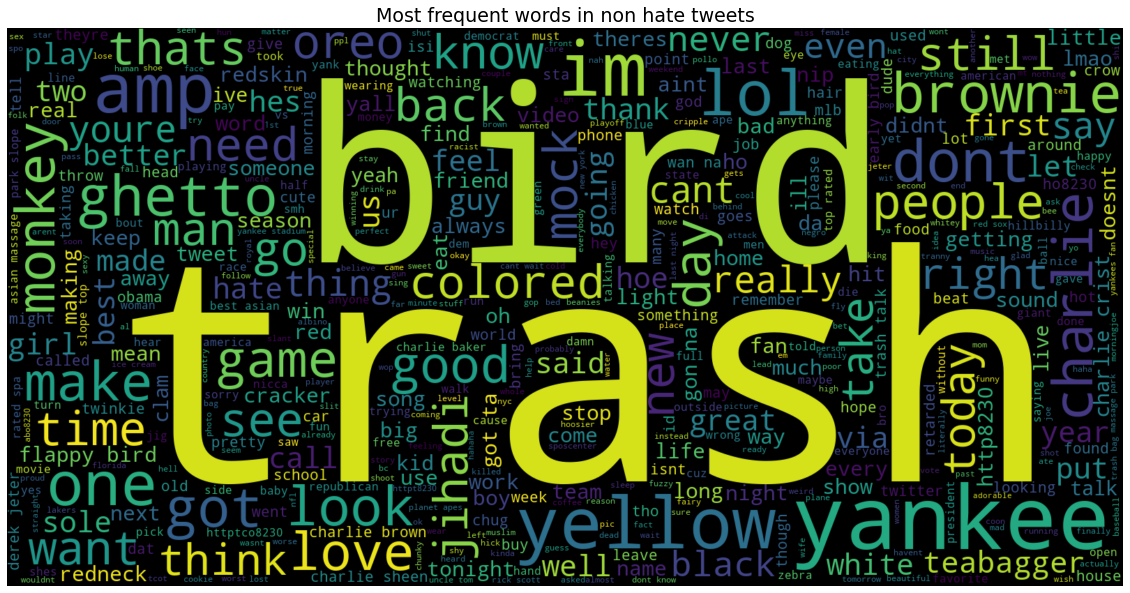

In [ ]:
from wordcloud import WordCloud
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [ ]:
#hate speech
hate_tweets = tweets[tweets.cls == 0]
hate_tweets.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  cls  \
85           85      3            2                   1        0    0   
89           90      3            3                   0        0    0   
110         111      3            3                   0        0    0   
184         186      3            3                   0        0    0   
202         204      3            2                   1        0    0   

                                                 tweet  
85   blackman38tide halelookyhere howdydowdy11 quee...  
89   cb_baby24 hite_thunduh alsarabsss hes beaner s...  
110  devilgrimz vigxras youre fucking gay blacklist...  
184  markroundtreejr lmfaoooo hate black people the...  
202  nochillpaz least im nigger httptcorgja7cfoit l...

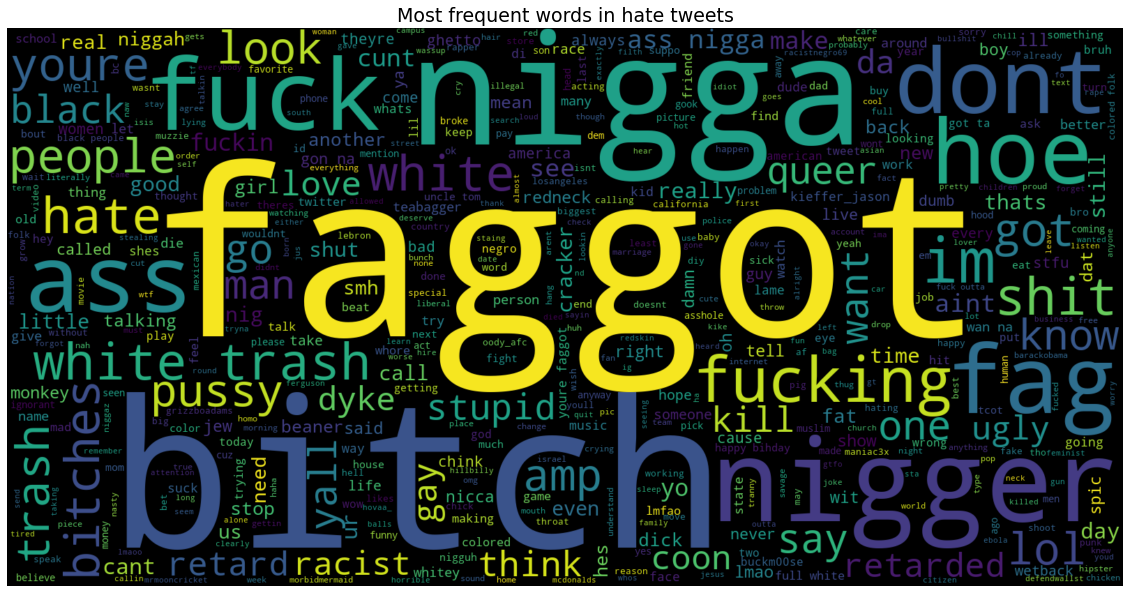

In [ ]:
text = ' '.join([word for word in hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [ ]:
#offensive speech
offensive_tweets = tweets[tweets.cls == 1]
offensive_tweets.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  cls  \
1           1      3            0                   3        0    1   
2           2      3            0                   3        0    1   
3           3      3            0                   2        1    1   
4           4      6            0                   6        0    1   
5           5      3            1                   2        0    1   

                                               tweet  
1  mleew17 boy dats coldtyga dwn bad cuffin dat h...  
2  urkindofbrand dawg 80sbaby4life ever fuck bitc...  
3           c_g_anderson viva_based look like tranny  
4  shenikarobes shit hear might true might faker ...  
5  t_madison_x shit blows meclaim faithful somebo...

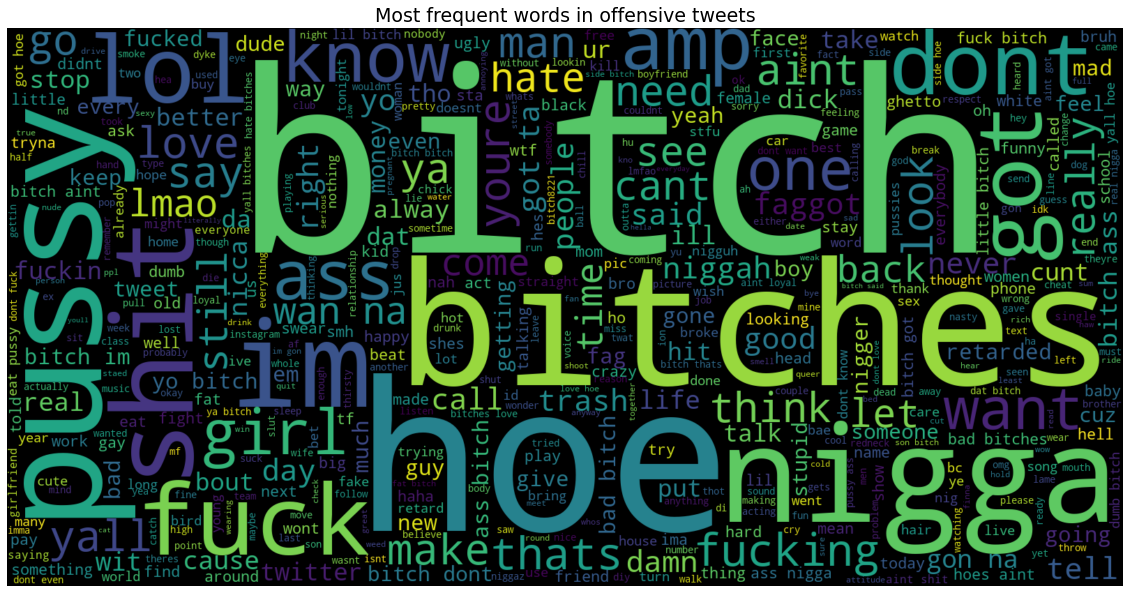

In [ ]:
text = ' '.join([word for word in offensive_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in offensive tweets', fontsize = 19)
plt.show()

In [ ]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweets['tweet'])

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 183898

First 20 features: 
['007' '007 httptcoon5t60rmfb' '007beardownjedi' '007beardownjedi afl'
 '007hezrumble' '007hezrumble httptcoqyn1bc7mxs' '007m_h'
 '007m_h lilduval' '00_jackie' '00_jackie darknight420' '00_jackie wan'
 '00sexilexi00' '00sexilexi00 bitch' '00sexilexi00 freeze'
 '00sexilexi00 httptcop3heuboqbu' '00sexilexi00 nigga'
 '00sexilexi00 socass_' '00sexilexi00 swiggety' '01' '01 going']


In [ ]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweets['tweet'])

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 342413

First 20 features: 
['007' '007 httptcoon5t60rmfb' '007beardownjedi' '007beardownjedi afl'
 '007beardownjedi afl american' '007hezrumble'
 '007hezrumble httptcoqyn1bc7mxs' '007hezrumble httptcoqyn1bc7mxs via'
 '007m_h' '007m_h lilduval' '007m_h lilduval damn' '00_jackie'
 '00_jackie darknight420' '00_jackie darknight420 allahthefairy'
 '00_jackie wan' '00_jackie wan na' '00sexilexi00' '00sexilexi00 bitch'
 '00sexilexi00 bitch ass' '00sexilexi00 freeze']


### Building the model

In [ ]:
X = tweets['tweet']
Y = tweets['cls']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Splitting the datasets

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (19758, 342413)
Size of y_train: (19758,)
Size of x_test:  (4940, 342413)
Size of y_test:  (4940,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Train accuarcy: {:.2f}%".format(logreg_acc*100))

Train accuarcy: 84.90%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[  10  265    8]
 [   7 3744   43]
 [   1  422  440]]


              precision    recall  f1-score   support

           0       0.56      0.04      0.07       283
           1       0.84      0.99      0.91      3794
           2       0.90      0.51      0.65       863

    accuracy                           0.85      4940
   macro avg       0.77      0.51      0.54      4940
weighted avg       0.84      0.85      0.82      4940



### Test set
Importing the test set

In [ ]:
files = '/content/drive/MyDrive/ML_Final/hate-speech-dataset/all_files/'
#pd.read_csv(files + "12834217_1"+".txt", delimiter='\t')

# data = glob.glob(os.path.join(files, "*.txt"))


# # loop over the list of csv files
# for f in data:

#     # read the csv file
#     df = pd.read_csv(f)

In [ ]:
test_tweets_labels = pd.read_csv('/content/drive/MyDrive/ML_Final/hate-speech-dataset/annotations_metadata.csv')

In [ ]:
test_tweets_labels.tail()

file_id  user_id  subforum_id  num_contexts   label
0  12834217_1   572066         1346             0  noHate
1  12834217_2   572066         1346             0  noHate
2  12834217_3   572066         1346             0  noHate
3  12834217_4   572066         1346             0    hate
4  12834217_5   572066         1346             0  noHate

In [ ]:
test_tweets_labels.loc[0, 'label'] = str(pd.read_csv(files + "12834217_1" +".txt", delimiter='\t'))

# writing into the file
test_tweets_labels.to_csv("annotations_metadata.csv", index=False)
# if i ==100:
# break

In [ ]:
import csv
for i in range(len(test_tweets_labels)):
  # updating the column value/data
  x=test_tweets_labels.iloc[i,0]
  test_tweets_labels.loc[i, 'file_id'] = str(pd.read_csv(files + x +".txt", delimiter='\t',quoting=csv.QUOTE_NONE))
  print(i)
# writing into the file
  test_tweets_labels.to_csv("annotations_metadata.csv", index=False)
# if i ==100:
# break

Streaming output truncated to the last 5000 lines.
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133

In [ ]:
test_tweets_labels.file_id = test_tweets_labels['file_id'].apply(data_processing)

In [ ]:
test_tweets_labels.label

0        noHate
1        noHate
2        noHate
3          hate
4        noHate
          ...  
10939    noHate
10940    noHate
10941    noHate
10942      hate
10943    noHate
Name: label, Length: 10944, dtype: object

In [ ]:
print(test_tweets_labels ['file_id'].iloc[0],"\n")
print(test_tweets_labels ['file_id'].iloc[1],"\n")

march 13th 2014 booklet downloaded 18300 times counting index 

order help increase booklets downloads would great stormfronters youtube accounts could display following text description boxes uploaded youtube videos index 



#### Pre-processing test data

In [ ]:
test_tweets_labels.label = test_tweets_labels['label'].apply(data_processing)

In [ ]:
# Removing duplicates

test_tweets_labels = test_tweets_labels.drop_duplicates('file_id')

In [ ]:
# Applying lametisation on test data

test_tweets_labels['file_id'] = test_tweets_labels['file_id'].apply(lambda x: lemmatising(x))

In [ ]:
# printing the data to see the effect of preprocessing

print(test_tweets_posts ['label'].iloc[0],"\n")
print(test_tweets_posts ['label'].iloc[1],"\n")

noHate 

noHate 



In [ ]:
test_tweets_posts['label'].value_counts()

noHate      9507
hate        1196
relation     168
idk/skip      73
Name: label, dtype: int64

#### Visualising test data

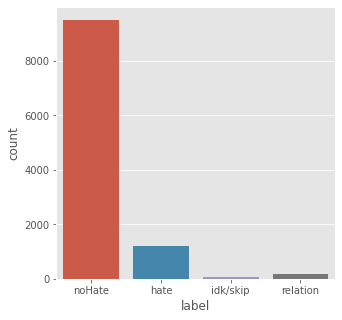

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = test_tweets_posts)

Text(0.5, 1.0, 'Distribution of implict hate on Twitter')

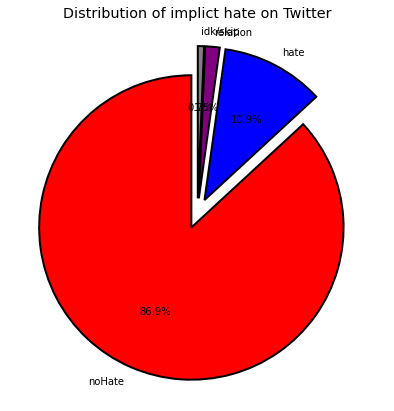

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "blue", "purple", "grey")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = test_tweets_posts['label'].value_counts()
explode = (0.1, 0.1, 0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=False, colors = colors, startangle =90,
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of implict hate on Twitter')

In [ ]:
# Each category
white_grievance = test_tweets_posts[test_tweets_posts.implicit_class == 'white_grievance']
incitement = test_tweets_posts[test_tweets_posts.implicit_class == 'incitement']
stereotypical = test_tweets_posts[test_tweets_posts.implicit_class == 'stereotypical']
inferiority = test_tweets_posts[test_tweets_posts.implicit_class == 'inferiority']
irony = test_tweets_posts[test_tweets_posts.implicit_class == 'irony']
threatening = test_tweets_posts[test_tweets_posts.implicit_class == 'threatening']
other = test_tweets_posts[test_tweets_posts.implicit_class == 'other']


inferiority.head()

post implicit_class  \
46    throw weekly standard filthy white trash disgust    inferiority   
89           take back one parents must white purebred    inferiority   
98   fundamentally different whites better without ...    inferiority   
104  jews want girls reject white men use white wom...    inferiority   
133             doesnt want white married stinking jew    inferiority   

    extra_implicit_class  
46                   NaN  
89                   NaN  
98                   NaN  
104                  NaN  
133                  NaN

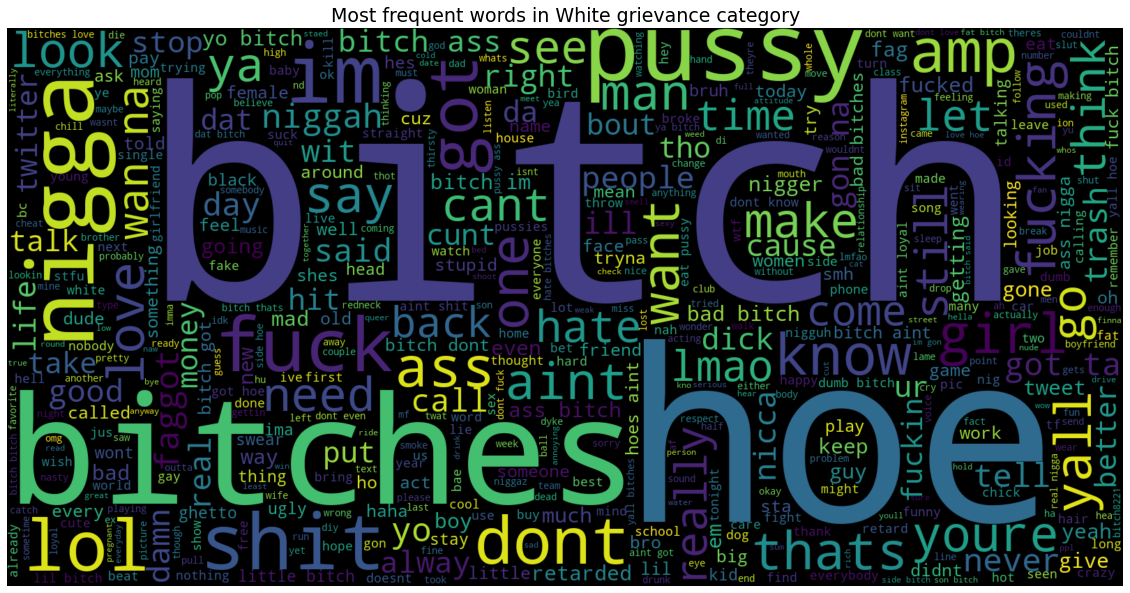

In [ ]:
post = ' '.join([word for word in white_grievance['post']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in White grievance category', fontsize = 19)
plt.show()

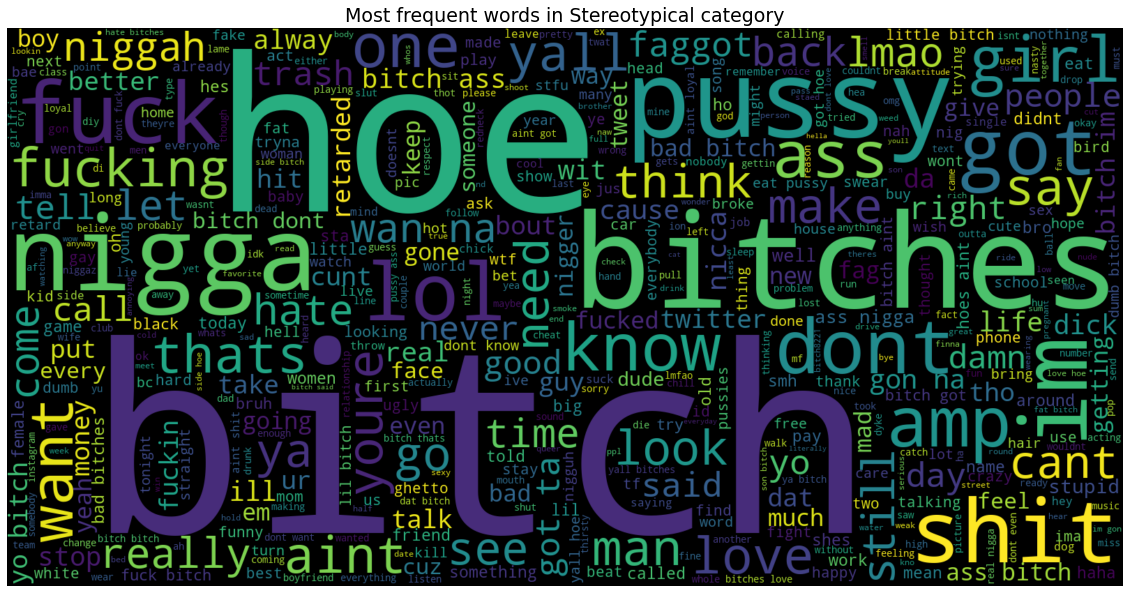

In [ ]:
post = ' '.join([word for word in stereotypical['post']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Stereotypical category', fontsize = 19)
plt.show()

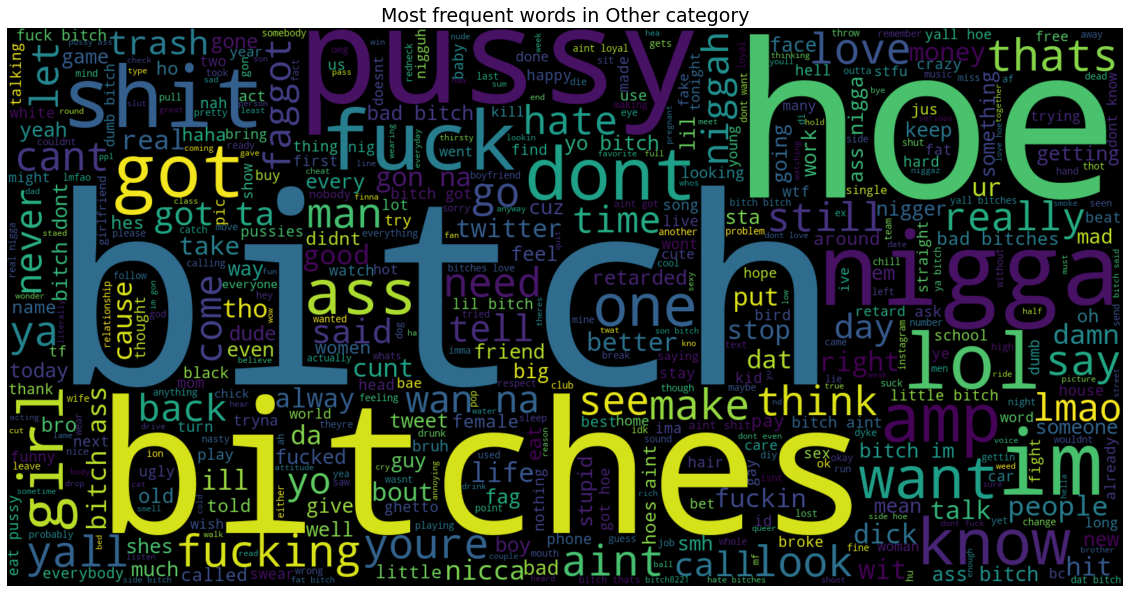

In [ ]:
post = ' '.join([word for word in irony['post']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Irony category', fontsize = 19)
plt.show()

#### Passing test data through the model

In [ ]:
# Vector of features

vector = TfidfVectorizer(ngram_range=(1,6)).fit(test_tweets_labels['file_id'])
features = vector.get_feature_names_out()
print("Number of features: {}\n".format(len(features)))
print("First 20 features: \n{}".format(features[:20]))

Number of features: 351971

First 20 features: 
['00' '00 32' '00 32 00' '00 32 00 48' '00 32 00 48 00'
 '00 32 00 48 00 50' '00 48' '00 48 00' '00 48 00 50' '00 48 00 50 00'
 '00 48 00 50 00 link' '00 50' '00 50 00' '00 50 00 link'
 '00 50 00 link discuss' '00 50 00 link discuss moscow' '00 anyone'
 '00 anyone index' '00 area' '00 area index']


In [ ]:
x = test_tweets_labels['file_id']
y = test_tweets_labels['label']
x = vector.transform(x)

NameError: ignored

In [ ]:
x1_train,x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
for i in range(len(test_tweets_labels)):
  first_non_na = test_tweets_labels.dropna().iloc[i,0]
# check which columns are expected by the model, but not exist in the inference dataframe
not_existing_cols = [c for c in test_tweets_labels.columns.tolist() if c not in X]
# add this columns to the data frame
Xjoker = X.reindex(X.columns.tolist() + not_existing_cols, axis=1)
# new columns dont have values, replace null by 0
Xjoker.fillna(0, inplace = True)
# use the original X structure as mask for the new inference dataframe
Xjoker = Xjoker[X.columns.tolist()]

TypeError: ignored

In [ ]:
logreg_predict2 = logreg.predict(x1_test)
logreg_acc2 = accuracy_score(logreg_predict2, y1_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc2 * 100))

ValueError: ignored